In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Import necessary modules.

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow
from google.colab import drive

import seaborn as sns

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
downloaded = drive.CreateFile({'id':"1VZm2vM_SayfsdDfq0LEuuv8A54Mxepra"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Labels.csv')        # replace the file name with your file
download_images=drive.CreateFile({'id':"1HIl3k442rZJQGqIhlkBwMyqo1cShzFOw"})
download_images.GetContentFile("images.npy");

import pandas as pd
data_Label = pd.read_csv('Labels.csv')

dat_image=np.load('images.npy',mmap_mode='r',allow_pickle=True,encoding='ASCII')


NameError: ignored

In [35]:
download_report=drive.CreateFile({'id':"18uR9hhwUjw2-Ivs35MGzYQsnVlh4TpNN"})
download_report.GetContentFile("testDataPath.txt");


In [3]:
X_Train=dat_image
Y_DataSet=data_Label

<bound method IndexOpsMixin.value_counts of 0       Small-flowered Cranesbill
1       Small-flowered Cranesbill
2       Small-flowered Cranesbill
3       Small-flowered Cranesbill
4       Small-flowered Cranesbill
                  ...            
4745             Loose Silky-bent
4746             Loose Silky-bent
4747             Loose Silky-bent
4748             Loose Silky-bent
4749             Loose Silky-bent
Name: Label, Length: 4750, dtype: object>

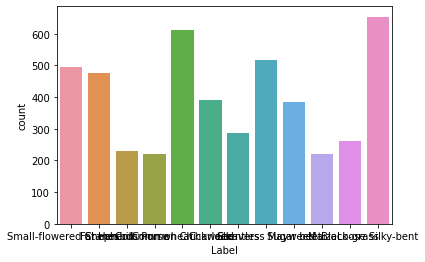

In [4]:
Y_Data=Y_DataSet["Label"]
g=sns.countplot(Y_Data)
Y_Data.value_counts


In [6]:
# Now we create an empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
new_x = np.empty((4750, 128, 128, 3)) 

# Now we apply the gaussian blur to each 28x28 pixels array (image) to reduce the noise in the image
#for idx, img in enumerate(dat_image):
 # new_x[idx] = cv2.GaussianBlur(img, (5, 5), 0)

In [7]:
new_x[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [8]:

#NOrmalization of DataSet

from sklearn import preprocessing

x_min = np.min(new_x, axis=tuple(range(new_x.ndim-1)), keepdims=1)
x_max = np.max(new_x,axis=tuple(range(new_x.ndim-1)), keepdims=1)

#print(x_min)
#print(x_max)

x_norm =  (new_x - x_min)/(x_max-x_min)





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


In [9]:
# Gaussian Blurring

# Now we create an empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
x_Gauss = np.empty((4750, 128, 128, 3)) 

# Now we apply the gaussian blur to each 28x28 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(x_norm):
  x_Gauss[idx] = cv2.GaussianBlur(img, (5, 5), 0)

In [10]:
# One Hot Encoding For Y_Label categorical Variables
Y_Labels = preprocessing.LabelEncoder()
Y_Data_Label = Y_Labels.fit_transform(Y_Data)


In [12]:
df_Labels=pd.DataFrame(data=Y_Data_Label)

Y_Label_HotEnc = preprocessing.OneHotEncoder()
Y_Label_HotEnc.fit_transform(df_Labels)
df_Labels[:].max()
Y_train = np.array(df_Labels)

In [13]:
Y_train


array([[10],
       [10],
       [10],
       ...,
       [ 6],
       [ 6],
       [ 6]])

In [14]:
X_FinalData=x_Gauss
Y_FinalData=Y_train

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_FinalData, Y_FinalData, test_size = 0.3)


In [16]:


y_test,y_Validation=np.split(y_test,indices_or_sections=[712])
X_test,X_Validation=np.split(X_test,indices_or_sections=[712])

In [17]:
X_train.shape

(3325, 128, 128, 3)

No need to Reshape


In [18]:
# Set the CNN model

batch_size = None

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [19]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [20]:
# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [21]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [22]:


x_train = X_train.astype('float32') # Conversion to float type from integer type.
x_test = X_test.astype('float32')
x_train /= 255.0 # Division by 255
x_test /= 255.0
#x_test.shape
y_test.shape

(712, 1)

In [23]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [78]:
X_Train.shape

(4750, 128, 128, 3)

Epoch 1/10
103/104 [============================>.] - ETA: 0s - loss: 12.5001 - accuracy: 0.0604
Epoch 00001: val_loss did not improve from 12.75249
104/104 [==============================] - 3s 30ms/step - loss: 12.4858 - accuracy: 0.0605 - val_loss: 12.7525 - val_accuracy: 0.0463
Epoch 2/10
103/104 [============================>.] - ETA: 0s - loss: 12.4794 - accuracy: 0.0604
Epoch 00002: val_loss did not improve from 12.75249
104/104 [==============================] - 3s 28ms/step - loss: 12.4858 - accuracy: 0.0605 - val_loss: 12.7525 - val_accuracy: 0.0463
Epoch 3/10
103/104 [============================>.] - ETA: 0s - loss: 12.4767 - accuracy: 0.0610
Epoch 00003: val_loss did not improve from 12.75249
104/104 [==============================] - 3s 28ms/step - loss: 12.4858 - accuracy: 0.0605 - val_loss: 12.7525 - val_accuracy: 0.0463
Epoch 4/10
103/104 [============================>.] - ETA: 0s - loss: 12.4821 - accuracy: 0.0607
Epoch 00004: val_loss did not improve from 12.75249
10

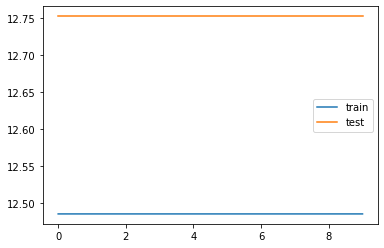

In [25]:
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=10,
                    validation_data=(x_test, y_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [36]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    "testDataPath.txt", # Put your path here
     target_size=(3325, 128),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

NotADirectoryError: ignored